In [116]:
import numpy as np    # import numpy library 
import pandas as pd # import pandas library
import pickle
import json

# import library for data visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# report for the eda of data frame
from pandas_profiling import ProfileReport


# for remove the warnings
import warnings
warnings.filterwarnings("ignore")

# import dataset
from sklearn.datasets import load_boston

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## step-1(Problem statement)
predict the house price of boston 

## setp-2 (Data gathering)

In [2]:
boston_data = load_boston() 

In [3]:
print(boston_data.DESCR)  # explore data set 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_data.data# independent feature values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
boston_data.target # dependent variable values

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
boston_data.feature_names # independen feature names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
#creating dataframe from the dataset
boston_df = pd.DataFrame(boston_data.data,columns = boston_data.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
# add target column in dataframe 
boston_df["Price"] = boston_data.target

In [9]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
# take backup of data
df = boston_df.copy()

## step-3(EDA or data validation)

In [11]:
# pf = ProfileReport(df)
# pf.to_file(output_file = "boston.html")

### univariate analysis

In [12]:
df.info() # information of dataframe about datatypes and null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
# check for the stats 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
df.select_dtypes(include = object) # check the object data type 

""
0
1
2
3
4
...
501
502
503
504


In [15]:
df.sample(5) # check the data frame rows randomly

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
92,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16,22.9
361,3.83684,0.0,18.10,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19,19.9
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9
458,7.75223,0.0,18.10,0.0,0.713,6.301,83.7,2.7831,24.0,666.0,20.2,272.21,16.23,14.9
137,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59,17.1


In [16]:
df.shape  # check the shape of dataframe 

(506, 14)

<AxesSubplot:xlabel='CRIM', ylabel='Density'>

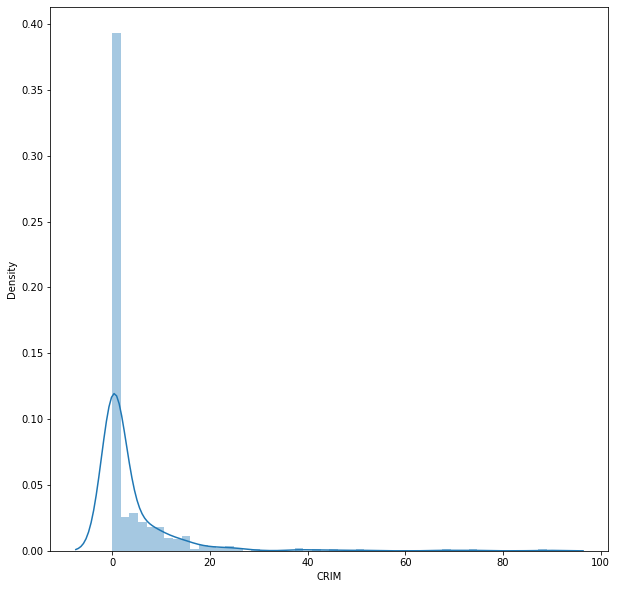

In [17]:
# check distribution for numerical data 
plt.figure(figsize = (10,10))
sns.distplot(df["CRIM"])

<AxesSubplot:>

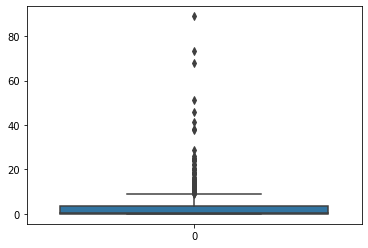

In [18]:
# check the outliers also
sns.boxplot(df["CRIM"]) # outliers present in this column

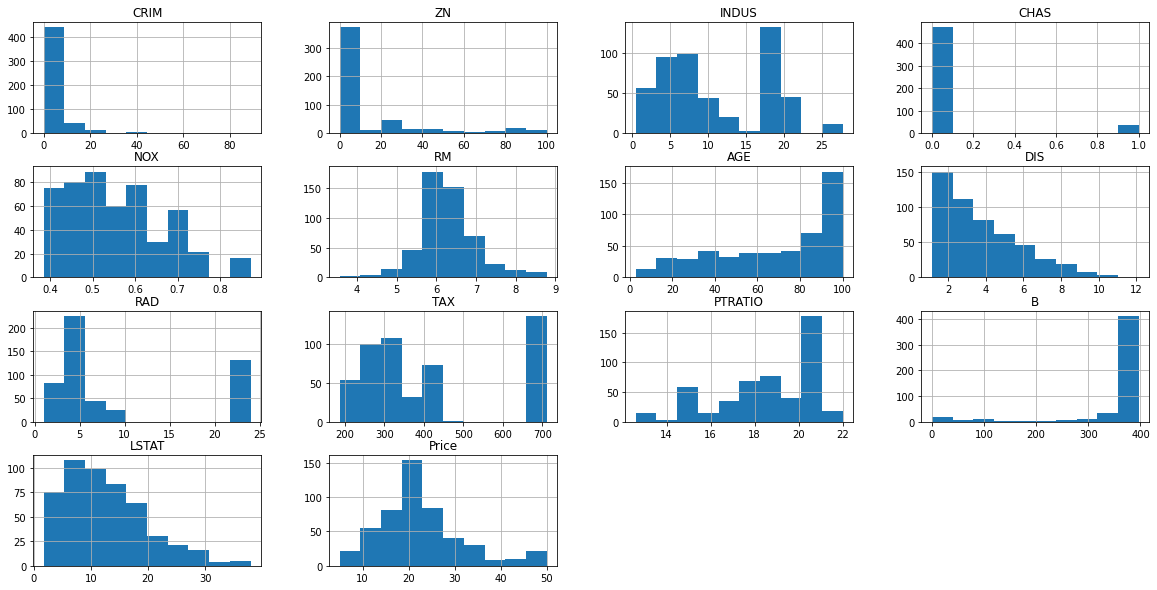

In [19]:
df.hist(figsize= (20,10)) # distribution of 
plt.show()

<AxesSubplot:>

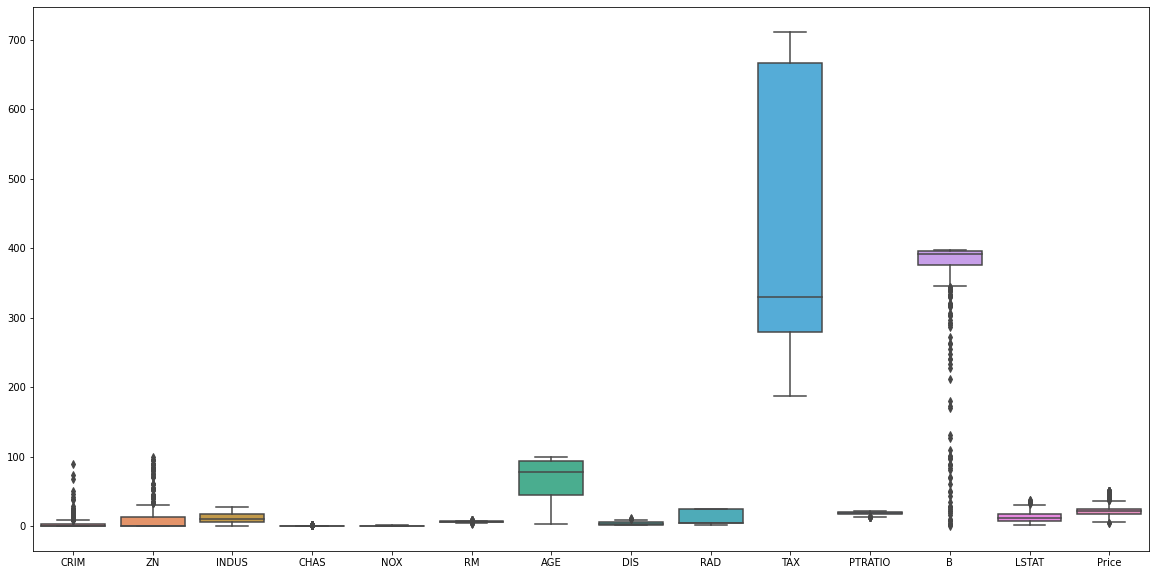

In [20]:
plt.figure(figsize = (20,10)) # outliers of all data frame first method
sns.boxplot(df)

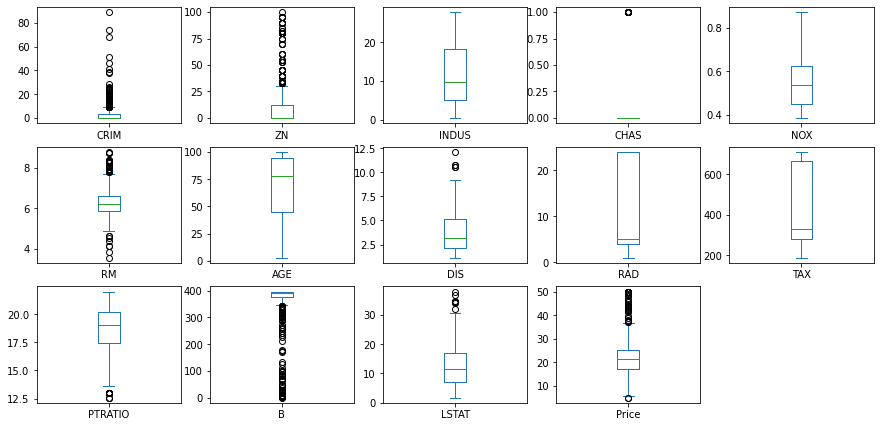

In [21]:
df.plot(kind='box', layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15) )
plt.show() # second ,method

### multivariate analysis 

In [22]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

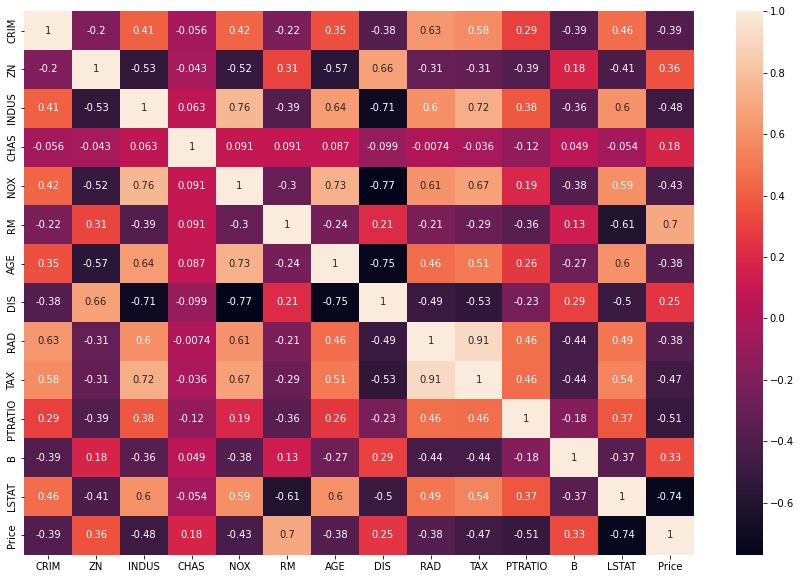

In [23]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:>

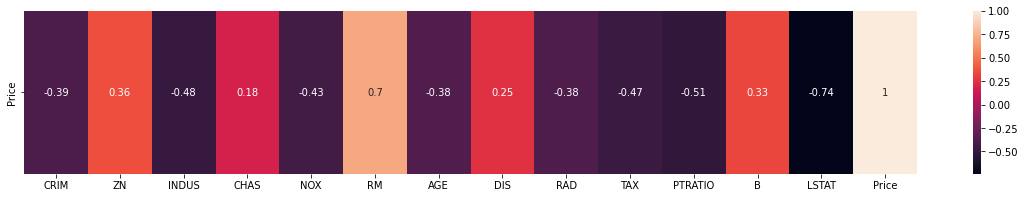

In [24]:
plt.figure(figsize =(20,3)) # check the correlation of independent feature with respect to target feature
sns.heatmap(df.corr().tail(1),annot = True)

## step-4 (feature_engineering)

#### we check outliers by numerically(IQR METHOD)

In [25]:
q1 = df["CRIM"].quantile(0.25)  
q2 = df["CRIM"].quantile(0.50)
q3 = df["CRIM"].quantile(0.75)

In [26]:
iqr = q3- q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

In [27]:
df[(df["CRIM"] > upper_tail) | (df["CRIM"] < lower_tail)]  # outliers data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
367,13.5222,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
371,9.2323,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
373,11.1081,0.0,18.1,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
374,18.4982,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
375,19.6091,0.0,18.1,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,15.5757,0.0,18.1,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13,19.1
469,13.0751,0.0,18.1,0.0,0.580,5.713,56.7,2.8237,24.0,666.0,20.2,396.90,14.76,20.1
477,15.0234,0.0,18.1,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
478,10.2330,0.0,18.1,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03,14.6


In [28]:
df[(df["CRIM"] < upper_tail) & (df["CRIM"] > lower_tail)] # without outliers data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [29]:
#fill that outliers with the mean of fair data
mean = df["CRIM"][(df["CRIM"] < upper_tail) & (df["CRIM"] > lower_tail)].mean()
df["CRIM"]  = np.where((df["CRIM"] > upper_tail) | (df["CRIM"] < lower_tail),mean,df["CRIM"])

In [30]:
df[(df["CRIM"] > upper_tail) | (df["CRIM"] < lower_tail)] # outliers are gone this is one method

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price


In [32]:
df1 = df.drop("Price", axis = 1) # drop Price feature and store in new datafrmae

In [33]:
for i in df1.columns:   # we fill the outliers with null values where are the outliers
    q1 = df1[i].quantile(0.25)
    q2 = df1[i].quantile(0.50)
    q3 = df1[i].quantile(0.75)
    
    iqr = q3-q1
    upper_tail = q3 + 1.5*iqr
    lower_tail = q1 - 1.5*iqr
    
    df1[i] = np.where((df1[i] > upper_tail) | (df1[i] < lower_tail),np.nan,df1[i])

In [34]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     438 non-null    float64
 1   ZN       438 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     471 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       476 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      501 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  491 non-null    float64
 11  B        429 non-null    float64
 12  LSTAT    499 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [35]:
df1.isna().sum()  # check the null values

CRIM       68
ZN         68
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
dtype: int64

In [36]:
imputer = KNNImputer() # make object of knn imputer class
arr     = imputer.fit_transform(df1)  # fill null values with the help of knn imputer 
df2     = pd.DataFrame(arr,columns = df1.columns) #we make dataframe of array beacuse it return in array so thats why we have make dataframe of it

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
17,0.7842,0.0,8.14,0.0,0.538,5.99,81.7,4.2579,4.0,307.0,21.0,386.75,14.67


In [38]:
df2.sample(5) # check five random rows of data frame 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
130,0.34006,0.0,21.89,0.0,0.624,6.458,98.9,2.1185,4.0,437.0,21.2,395.04,12.60
93,0.02875,28.0,15.04,0.0,0.464,6.211,28.9,3.6659,4.0,270.0,18.2,396.33,6.21
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4.0,304.0,18.4,396.23,12.73
299,0.05561,18.2,2.24,0.0,0.400,7.041,10.0,7.8278,5.0,358.0,14.8,371.58,4.74
36,0.09744,0.0,5.96,0.0,0.499,5.841,61.4,3.3779,5.0,279.0,19.2,377.56,11.41


In [39]:
df.isna().sum() # null values gone

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## step-5(feature selection)

In [42]:
df.corr() # it is also one of feature selection technique

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.274790,0.524638,0.089846,0.560728,-0.137576,0.393989,-0.410058,0.687492,0.660992,0.274176,-0.299775,0.286862,-0.219684
ZN,-0.274790,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.524638,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,0.089846,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.560728,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.137576,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.393989,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.410058,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.687492,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.660992,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

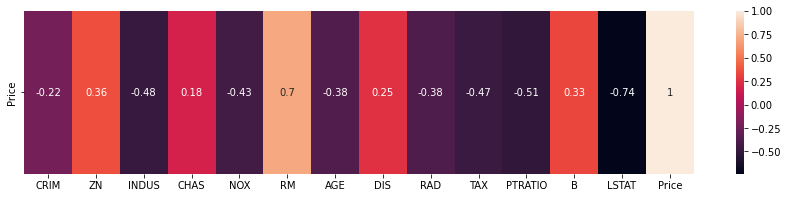

In [46]:
plt.figure(figsize = (15,3))
sns.heatmap(df.corr().tail(1),annot= True) # by seeing correlation values we can't decide which feature is important or not 

In [50]:
df2 = df2.drop("Price",axis = 1)

In [54]:
scal = StandardScaler()  # we scaling down the features for if we use knn algorithm than there scaling is required otherwise it takes too much time for trainig
arr1 = scal.fit_transform(df2)
df3_scaling = pd.DataFrame(arr1 ,columns = df2.columns)

In [98]:
norm_scal = MinMaxScaler()
arr2      = norm_scal.fit_transform(df2)
df3_norm  = pd.DataFrame(arr2, columns = df2.columns)

In [100]:
df3_norm["Price"] = boston_data.target

In [101]:
df3_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.000000,0.6,0.067815,0.0,0.314815,0.602988,0.641607,0.365784,0.000000,0.208015,0.202381,1.000000,0.111761,24.0
1,0.007464,0.0,0.242302,0.0,0.172840,0.548203,0.782698,0.474158,0.043478,0.104962,0.500000,1.000000,0.254814,21.6
2,0.007457,0.0,0.242302,0.0,0.172840,0.819993,0.599382,0.474158,0.043478,0.104962,0.500000,0.921716,0.079092,34.7
3,0.009264,0.0,0.063050,0.0,0.150206,0.753469,0.441813,0.609467,0.086957,0.066794,0.607143,0.956338,0.041609,33.4
4,0.022307,0.0,0.063050,0.0,0.150206,0.806475,0.528321,0.609467,0.086957,0.066794,0.607143,1.000000,0.123796,36.2


In [55]:
df3_scaling.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.945761,1.779877,-1.287909,0.0,-0.144217,0.626885,-0.120013,0.172284,-0.982843,-0.666608,-1.719034,0.808624,-1.115429
1,-0.912100,-0.503990,-0.593381,0.0,-0.740262,0.335989,0.367166,0.612109,-0.867883,-0.987329,-0.429080,0.808624,-0.492943
2,-0.912132,-0.503990,-0.593381,0.0,-0.740262,1.779138,-0.265812,0.612109,-0.867883,-0.987329,-0.429080,0.434711,-1.257584
3,-0.903986,-0.503990,-1.306878,0.0,-0.835284,1.425907,-0.809889,1.161251,-0.752922,-1.106115,0.035303,0.600078,-1.420687
4,-0.845164,-0.503990,-1.306878,0.0,-0.835284,1.707359,-0.511180,1.161251,-0.752922,-1.106115,0.035303,0.808624,-1.063057


In [56]:
df3_scaling["Price"] = boston_data.target # target variale add in dataframe
df3_scaling.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.945761,1.779877,-1.287909,0.0,-0.144217,0.626885,-0.120013,0.172284,-0.982843,-0.666608,-1.719034,0.808624,-1.115429,24.0
1,-0.912100,-0.503990,-0.593381,0.0,-0.740262,0.335989,0.367166,0.612109,-0.867883,-0.987329,-0.429080,0.808624,-0.492943,21.6
2,-0.912132,-0.503990,-0.593381,0.0,-0.740262,1.779138,-0.265812,0.612109,-0.867883,-0.987329,-0.429080,0.434711,-1.257584,34.7
3,-0.903986,-0.503990,-1.306878,0.0,-0.835284,1.425907,-0.809889,1.161251,-0.752922,-1.106115,0.035303,0.600078,-1.420687,33.4
4,-0.845164,-0.503990,-1.306878,0.0,-0.835284,1.707359,-0.511180,1.161251,-0.752922,-1.106115,0.035303,0.808624,-1.063057,36.2


## Step-6(Model selection)

In [58]:
x = df3_scaling.drop("Price",axis = 1) # store independent feature in x variable
y = df3_scaling["Price"]               # store dependent feature in y variable

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.2 ,random_state=45)

In [102]:
x1 = df3_norm.drop("Price",axis = 1) # store independent feature in x variable
y1 = df3_norm["Price"]            

In [103]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1 , test_size = 0.2 ,random_state=45)

## Step-7(Model_training)

### linear regression model

In [62]:
lr_model = LinearRegression() # with standar scalar
lr_model.fit(x_train,y_train)

LinearRegression()

In [104]:
lr_model = LinearRegression() # with min max scalar
lr_model.fit(x1_train,y1_train)

LinearRegression()

### knn regression model

In [66]:
knn_model_std = KNeighborsRegressor() # with standar scalar
knn_model_std.fit(x_train,y_train)

KNeighborsRegressor()

In [107]:
knn_model_norm = KNeighborsRegressor() # with min max scalar
knn_model_norm.fit(x1_train,y1_train)

KNeighborsRegressor()

In [117]:
# if we put k value 6 and p value 1
knn_model2 = KNeighborsRegressor(n_neighbors=6,p=1) # with standard scalar and hyper meter
knn_model2.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=6, p=1)

In [109]:
knn_model2_norm = KNeighborsRegressor(n_neighbors=6,p=1) # with min max scalar with hyper parameter
knn_model2_norm.fit(x1_train,y1_train)

KNeighborsRegressor(n_neighbors=6, p=1)

## Step-8(Model_evaluation)

### linear_model

In [86]:
y_pred_train = lr_model.predict(x_train)
mae          = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)
mse          = mean_squared_error(y_train,y_pred_train)
print("mse",mse)
r2_lr_train    = r2_score(y_train,y_pred_train)
print("r2_value",r2_lr_train)

mae 3.679890617221028
mse 26.422772691439867
r2_value 0.6627168743269418


In [87]:
y_pred_test = lr_model.predict(x_test)
mae          = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)
mse          = mean_squared_error(y_test,y_pred_test)
print("mse",mse)
r2_lr_test     = r2_score(y_test,y_pred_test)
print("r2_value",r2_lr_test)

mae 4.03949100345175
mse 29.719792454664216
r2_value 0.7250152724930079


### knn_model with standard scalar

In [88]:
y_pred_train = knn_model.predict(x_train)
mae          = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)
mse          = mean_squared_error(y_train,y_pred_train)
print("mse",mse)
r2_knn_train     = r2_score(y_train,y_pred_train)
print("r2_value",r2_knn_train)

mae 2.5805445544554453
mse 16.8255099009901
r2_value 0.7852246379772463


In [89]:
y_pred_test = knn_model.predict(x_test)
mae          = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)
mse          = mean_squared_error(y_test,y_pred_test)
print("mse",mse)
r2_knn_test     = r2_score(y_test,y_pred_test)
print("r2_value",r2_knn_test)

mae 4.181176470588234
mse 34.52031372549019
r2_value 0.6805980702005192


### knn_model with min max scalar

In [112]:
y1_pred_train = knn_model_norm.predict(x1_train)
mae          = mean_absolute_error(y1_train,y1_pred_train)
print("mae",mae)
mse          = mean_squared_error(y1_train,y1_pred_train)
print("mse",mse)
r2_knn_train     = r2_score(y1_train,y1_pred_train)
print("r2_value",r2_knn_train)

mae 2.5788118811881184
mse 16.585803960396035
r2_value 0.7882844519426504


In [113]:
y1_pred_test = knn_model_norm.predict(x1_test)
mae          = mean_absolute_error(y1_test,y1_pred_test)
print("mae",mae)
mse          = mean_squared_error(y1_test,y1_pred_test)
print("mse",mse)
r2_knn_test     = r2_score(y1_test,y1_pred_test)
print("r2_value",r2_knn_test)

mae 4.194509803921568
mse 36.31709803921568
r2_value 0.6639731813944367


### we have to do hyper parter tunning for knn regresor for k and p value we have to take trade off point where trainig and testing accuracy is best

#### hyper parameter with standard scaling

Text(0.5, 1.0, 'comparison between testing and training')

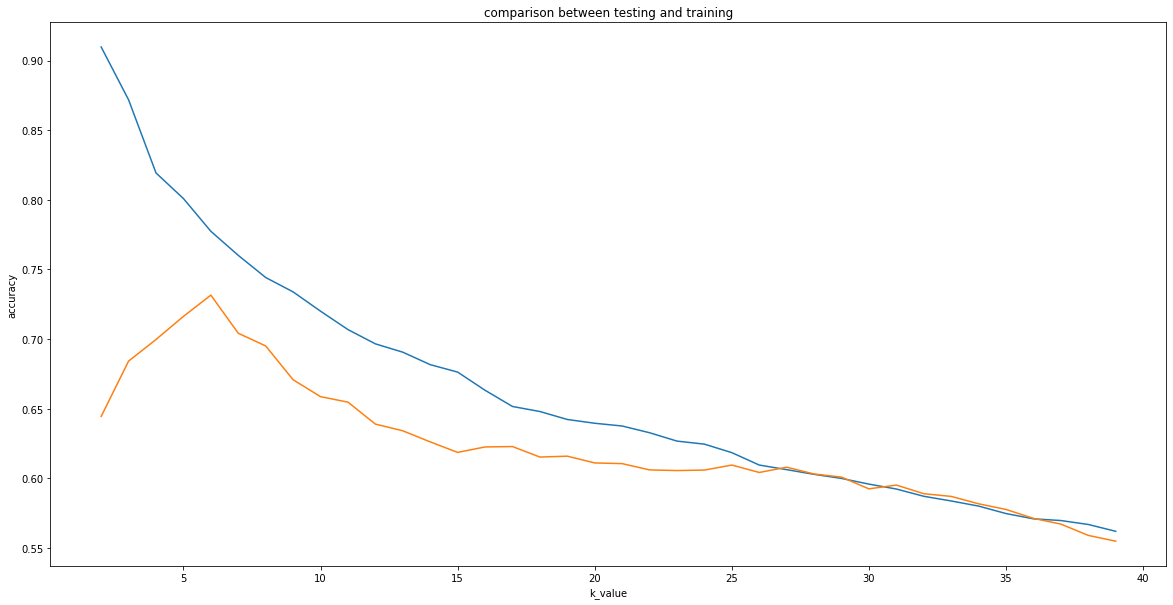

In [71]:

r2_train_list = []
r2_test_list = []
k_value = range(2,40)

for k in k_value:
    knn_reg = KNeighborsRegressor(k, p =1)
    knn_reg.fit(x_train,y_train)
    
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)

plt.figure(figsize = (20,10))     
plt.plot(k_value,r2_train_list)
plt.plot(k_value,r2_test_list)
plt.xlabel("k_value")
plt.ylabel("accuracy")
plt.title("comparison between testing and training")


Text(0.5, 1.0, 'comparison between testing and training')

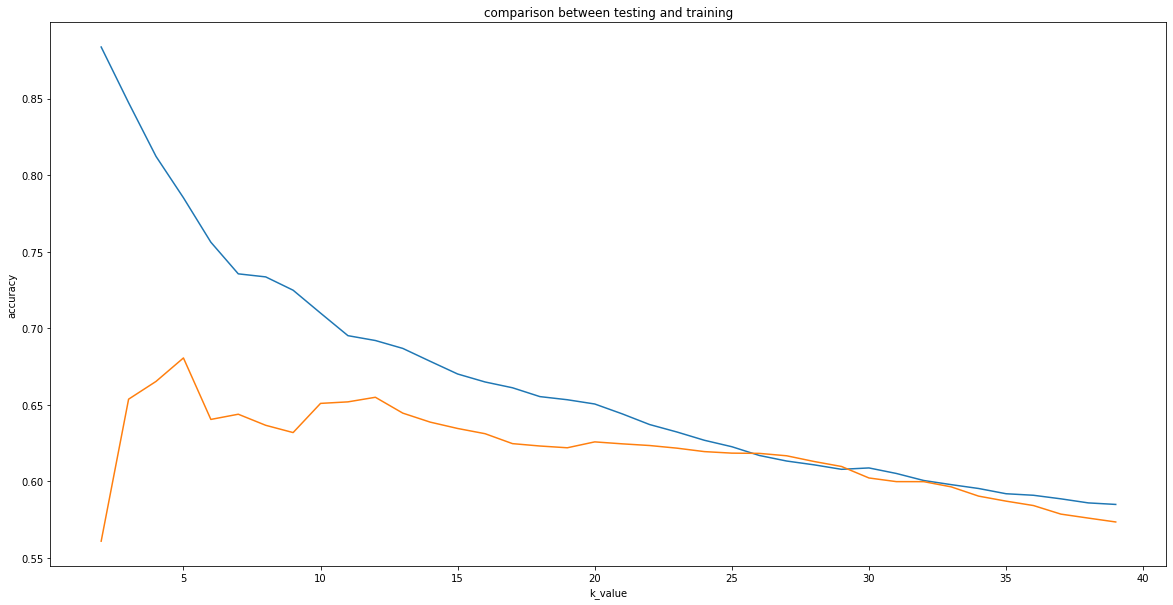

In [73]:
# for p value 2
r2_train_list = []
r2_test_list = []
k_value = range(2,40)

for k in k_value:
    knn_reg = KNeighborsRegressor(k, p =2)
    knn_reg.fit(x_train,y_train)
    
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)

plt.figure(figsize = (20,10))     
plt.plot(k_value,r2_train_list)
plt.plot(k_value,r2_test_list)
plt.xlabel("k_value")
plt.ylabel("accuracy")
plt.title("comparison between testing and training")

### hyper parameter with min max scalar

### accuracy increase from before we have to do some feature selection technique to improve more accuracy

In [90]:
y_pred_train = knn_model2.predict(x_train)
mae          = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)
mse          = mean_squared_error(y_train,y_pred_train)
print("mse",mse)
r2_k_tr_h     = r2_score(y_train,y_pred_train)
print("r2_value",r2_k_tr_h)

mae 2.6849422442244224
mse 17.436481710671064
r2_value 0.7774256653230978


In [91]:
y_pred_test = knn_model2.predict(x_test)
mae          = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)
mse          = mean_squared_error(y_test,y_pred_test)
print("mse",mse)
r2_k_te_h     = r2_score(y_test,y_pred_test)
print("r2_value",r2_k_te_h)

mae 3.8040849673202612
mse 29.008167211328974
r2_value 0.7315996412743224


In [94]:
# making report for algorithms use for accuracy with and without hyperparameter
report_dataframe = pd.DataFrame({"r2_lr":[r2_lr_train,r2_lr_test,np.nan,np.nan],"r2_knn":[r2_knn_train,r2_knn_test,r2_k_tr_h,r2_k_te_h]},index = ["training_without_h","testing_without_h","training_with_h","testing_with_h"])

In [95]:
report_dataframe

,r2_lr,r2_knn
training_without_h,0.662717,0.785225
testing_without_h,0.725015,0.680598
training_with_h,NaN,0.777426
testing_with_h,NaN,0.731600


## exporting files

In [120]:
columns_list = {"columns": list(x_train.columns)}

In [118]:
# export all the file which is related to write api
# model file
with open ("knn_model.pkl" , "wb") as f:
    pickle.dump(knn_model2,f)

In [119]:
# standard scaling file
with open("std_scaling.pkl", "wb")  as f:
    pickle.dump(scal,f)

In [121]:
# alla columns list
with open("columns.json","w") as f:
    json.dump(columns_list,f)